#### Os dados, até a data do presente estudo, estão no https://covid.saude.gov.br/
#### O presente arquivo é de 30 de junho. Atenção: de acordo com o dia em que for feita a análise, a última barra da totalização por semana estará menor.
#### Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.

In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\fmasa\Downloads\HIST_PAINEL_COVIDBR_30jun2020.xlsx'
df = pd.read_excel(filename)

In [3]:
df.shape

(516100, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516100 entries, 0 to 516099
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   regiao                  516100 non-null  object        
 1   estado                  515973 non-null  object        
 2   municipio               510528 non-null  object        
 3   coduf                   516100 non-null  int64         
 4   codmun                  512544 non-null  float64       
 5   codRegiaoSaude          510528 non-null  float64       
 6   nomeRegiaoSaude         510528 non-null  object        
 7   data                    516100 non-null  datetime64[ns]
 8   semanaEpi               516100 non-null  int64         
 9   populacaoTCU2019        514084 non-null  object        
 10  casosAcumulado          516100 non-null  int64         
 11  casosNovos              516100 non-null  int64         
 12  obitosAcumulado         516100

In [5]:
df.sample(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
126091,Nordeste,PB,Cruz do Espírito Santo,25,250490.0,25001.0,1ª REGIAO MATA ATLANTICA,2020-05-05,19,17319,6,2,1,1,NaN,NaN,1.0
77933,Nordeste,PI,Morro Cabeça no Tempo,22,220665.0,22002.0,CHAPADA DAS MANGABEIRAS,2020-06-08,24,4532,10,0,0,0,NaN,NaN,0.0
197062,Nordeste,BA,Lapão,29,291915.0,29010.0,IRECE,2020-06-01,23,27223,0,0,0,0,NaN,NaN,0.0
289397,Sudeste,MG,Senhora dos Remédios,31,316620.0,31013.0,BARBACENA,2020-05-15,20,10459,0,0,0,0,NaN,NaN,0.0
126375,Nordeste,PB,Cuitegi,25,250520.0,25002.0,2ª REGIAO,2020-05-01,18,6803,0,0,0,0,NaN,NaN,0.0
7260,Norte,RO,Ministro Andreazza,11,110120.0,11002.0,CAFE,2020-05-22,21,9660,0,0,0,0,NaN,NaN,0.0
308961,Sudeste,RJ,Nova Iguaçu,33,330350.0,33005.0,METROPOLITANA I,2020-04-25,17,821128,283,17,23,2,NaN,NaN,1.0
430658,Sul,SC,São Cristóvão do Sul,42,421605.0,42009.0,ALTO VALE DO RIO DO PEIXE,2020-06-29,27,5549,5,0,0,0,NaN,NaN,0.0
202728,Nordeste,BA,Palmeiras,29,292350.0,29023.0,SEABRA,2020-06-03,23,9019,1,0,0,0,NaN,NaN,0.0
379411,Sul,PR,Centenário do Sul,41,410510.0,41017.0,17ª RS LONDRINA,2020-04-11,15,10827,0,0,0,0,NaN,NaN,0.0


In [6]:
df.groupby('estado')['obitosAcumulado'].max().sort_values(ascending=False)

estado
SP    14763
RJ    10080
CE     6146
PA     4920
PE     4829
AM     2823
MA     2048
BA     1853
ES     1648
AL     1052
RN     1034
PB      977
MG      965
SE      676
PI      663
PR      649
RS      614
MT      593
DF      587
RO      518
GO      474
AP      417
AC      365
SC      341
RR      283
TO      200
MS       76
Name: obitosAcumulado, dtype: int64

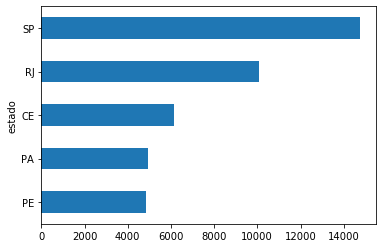

In [7]:
df.groupby('estado')['obitosAcumulado'].max().sort_values().tail(5).plot(kind='barh')

In [8]:
df['data'] = df['data'].dt.strftime('%d/%m')

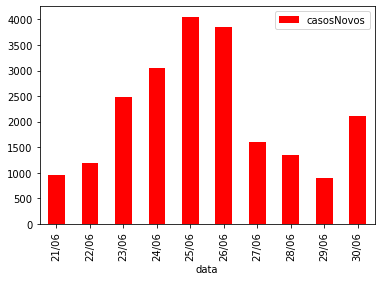

In [9]:
sp = df.query('municipio == "São Paulo"')
sp.tail(10).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

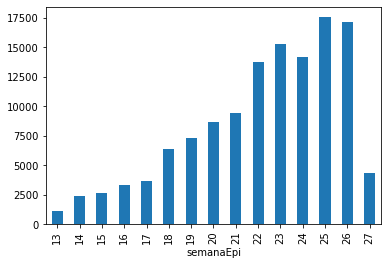

In [10]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')

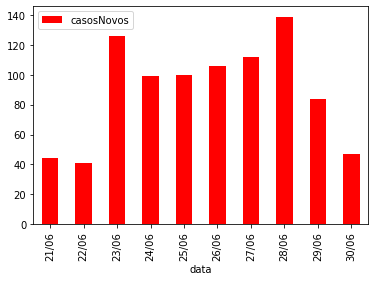

In [11]:
sjc = df.query('municipio == "São José dos Campos"')
sjc.tail(10).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

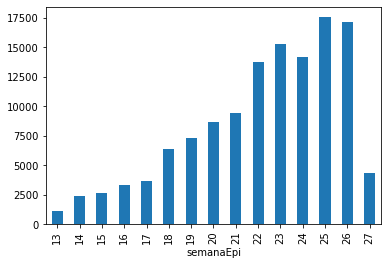

In [12]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')